In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# Abrimos el archivo y lo pasamos a una lista, que contiene tuplas 

with open('P1grupo_9.csv', 'r') as f:
    matriz = list(csv.reader(f))
eliminar = matriz.pop(0) # elimina [x,y]
# Matriz = Datos
for i, (x, y) in enumerate(matriz):
    matriz[i] = (float(x), float(y))

In [3]:
dt = pd.read_csv('P1grupo_9.csv')
dt

,x,y
0,0.016,0.118485
1,0.016,0.118485
2,0.022,5.866850
3,0.040,0.940516
4,0.052,0.297763
...,...,...
995,9.974,39.638106
996,9.977,32.935843
997,9.978,34.187592
998,9.989,31.194713


(a) Aplique el metodo de optimizacion visto en el curso con que resolvimos el problema de regresion
lineal. Deduzca la formula para encontrar los coeficientes a partir de los datos.

El desarrollo esta en el pdf










(b) Encuentre los valores de β0, β1, β2 ∈ R buscados., (lo resolvimos de esta forma porque no pueden usar comandos ya creados)

Tenemos que minimizamos la funcion:
                f(β0, β1, β2) = Σ(yi - (β0 + β1xi + β2xi^2))^2


Para encontrar los coeficientes β0, β1, β2 que minimizan la funcion, primero derivamos parcialmente a cada uno de los coeficientes (β0, β1, β2)


derivada parcial en β0:     ∂f/∂β0 = -2∑(i=1 hasta n)  (Yi - (β0 + β1 * Xi + β2 * Xi^2))

derivada parcial en β1:     ∂f/∂β1 = -2∑(i=1 hasta n)  (Xi * (Yi - (β0 + β1 * Xi + β2 * Xi^2)))

derivada parcial en β2:     ∂f/∂β2 = -2∑(i=1 hasta n)  (Xi^2 * (Yi - (β0 + β1 * Xi + β2 * Xi^2)))


Igualando estas derivadas parciales a cero y resolviendo el sistema de ecuaciones resultante, tenemos:

            ∑(i=1 hasta n)Yi = β0 * n + β1 * ∑(i=1 hasta n) Xi + β2 * ∑(i=1 hasta n) Xi^2
            ∑(i=1 hasta n)Xi * Yi = β0 * ∑(i=1 hasta n)Xi + β1 * ∑(i=1 hasta n)Xi^2 + β2 * ∑(i=1 hasta n)Xi^3
            ∑(i=1 hasta n)Xi^2 * Yi = β0 * ∑(i=1 hasta n)Xi^2 + β1 * ∑(i=1 hasta n)Xi^3 + β2 * ∑(i=1 hasta n)Xi^4

con n igual al numero de filas

Para encontrar los valores 

tenemos que solucionar la matriz:

    n                      ∑(i=1 hasta n)Xi           ∑(i=1 hasta n)Xi^2     |    ∑(i=1 hasta n)Yi
    ∑(i=1 hasta n)Xi       ∑(i=1 hasta n)Xi^2         ∑(i=1 hasta n)Xi^3     |    ∑(i=1 hasta n)Xi * Yi
    ∑(i=1 hasta n)Xi^2     ∑(i=1 hasta n)Xi^3         ∑(i=1 hasta n)Xi^4     |    ∑(i=1 hasta n)Xi^2 * Yi

In [4]:
def sumatoria_(matriz, elevar_x, elevar_y = 0) -> float:
    suma = 0
    for indice, (x, y) in enumerate(matriz):
        suma += (x ** elevar_x) * (y ** elevar_y)
    return suma

# la funcion crea la sumatoria

In [5]:
# Datos
valor_1_1 = 1000 
valor_1_2 = sumatoria_(matriz, 1) 
valor_1_3 = sumatoria_(matriz, 2) 
resultado_1 = sumatoria_(matriz, 0, 1)

valor_2_1 = sumatoria_(matriz, 1) 
valor_2_2 = sumatoria_(matriz, 2) 
valor_2_3 = sumatoria_(matriz, 3) 
resultado_2 = sumatoria_(matriz, 1, 1)


valor_3_1 = sumatoria_(matriz, 2) 
valor_3_2 = sumatoria_(matriz, 3) 
valor_3_3 = sumatoria_(matriz, 4) 
resultado_3 = sumatoria_(matriz, 2, 1)


In [6]:
A = [ [valor_1_1,valor_1_2, valor_1_3],
      [valor_2_1, valor_2_2, valor_2_3],
      [valor_3_1, valor_3_2, valor_3_3] ]

b = [ resultado_1, resultado_2, resultado_3]

respuesta = np.linalg.solve(A, b)

Resolviendo nos queda:

β0 = 2.92615334

β1 = -0.05045351

β2 = 0.33408962


(c) Grafique en conjunto los datos entregados y la regresion cuadratica encontrada.


In [7]:
def funcion(b_0, b_1, b_2, x):
    return b_0 + b_1 * x + b_2 *(x**2) 

#la funcion representa: β0 + β1x + β2x2

In [8]:
fun = []

for i in range(0, 11):
    fun.append(funcion(respuesta[0], respuesta[1], respuesta[2], i))

In [9]:
x = [coord[0] for coord in matriz]
y = [coord[1] for coord in matriz]

Text(0.5, 1.0, 'Grafico')

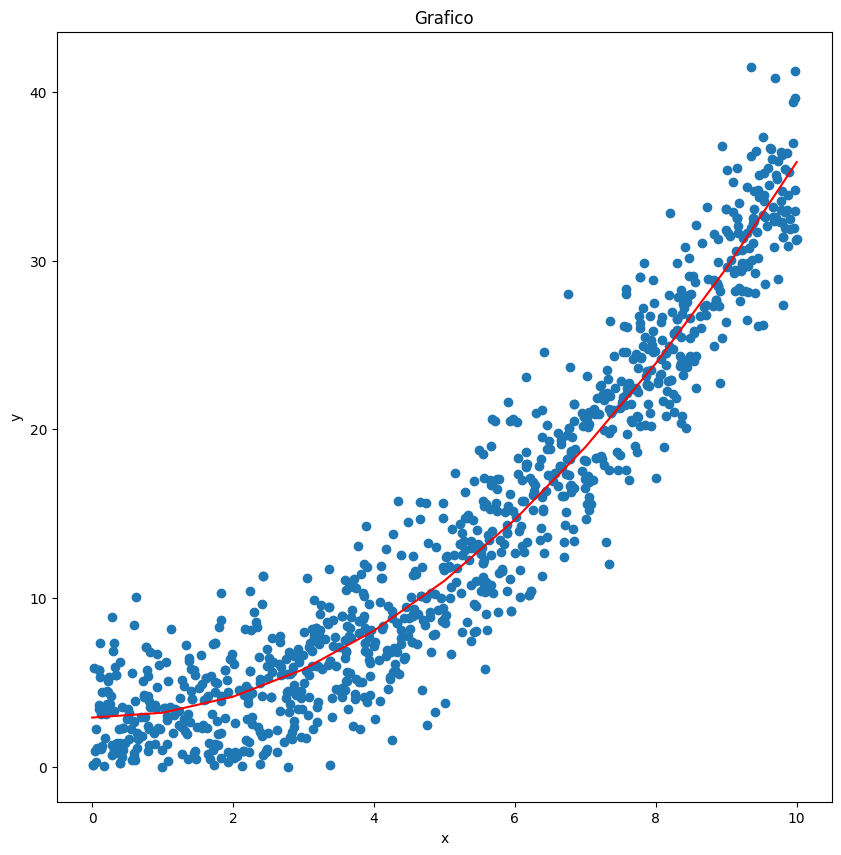

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.scatter(x, y, marker="o")
ax.plot(fun, color = "red")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Grafico")
